In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from matplotlib_venn import venn2
import seaborn as sb

In [2]:
dir_fig = 'plots_svs/'

In [3]:
file_cov = '/expanse/projects/sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
#file_cov = '/tscc/projects/ps-sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
df_cov = pd.read_table(file_cov, header=0, sep='\t')
multiplat_samples = ['REACH000236', 'REACH000530', 'REACH000531', 'REACH000532', 'REACH000436']
df_cov['SAMPLE'] = df_cov.apply(lambda row: row['SAMPLE']+'_'+row['COHORT'] if row['SAMPLE'] in multiplat_samples else row['SAMPLE'], axis=1)
df_cov_high = df_cov.loc[df_cov.SAMPLE.str.startswith('REACH000') & (df_cov.MEAN_COVERAGE > 9)]
display(df_cov)
high_cov_samples = df_cov_high.SAMPLE.tolist()
#print(high_cov_samples)

def get_plat(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['COHORT'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

def get_cov(sample, plat):
    try:
        ret = df_cov[(df_cov.SAMPLE == sample) & (df_cov.COHORT == plat)]['MEAN_COVERAGE'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

plat_dict = {sample: get_plat(sample) for sample in df_cov.SAMPLE.tolist()}

,SAMPLE,COHORT,MEAN_COVERAGE
0,HG004,ONT,81.44
1,REACH000626,ONT,10.51
2,REACH000546,ONT,10.87
3,REACH000683,ONT,9.97
4,REACH000563,ONT,8.68
...,...,...,...
283,REACH000284,PB,3.43
284,REACH000672,PB,5.02
285,REACH000292,PB,9.00
286,REACH000066,PB,1.61


In [4]:
# read the big table
file_name = 'test.tsv'
df = pd.read_table(file_name, sep='\t', header=0)

/tmp/ipykernel_1603657/1689111987.py:3: DtypeWarning: Columns (25,64,66,67,71,72,73,74,75,76,77,78,82,93,94,95,96,97,98,99,100,104,105,106,107,108,109,110,111,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(file_name, sep='\t', header=0)


In [5]:
def get_df_flt(df, flt_name, svtypes, ext_col=None, flt_sd_art=True, freq_thr=None):
    if not ext_col:
        df_flt = df.loc[((df[f'NUM_{flt_name}'] > 0) | (df['NUM_IL_SAMPLES'] > 0)) & (df.SVTYPE.isin(svtypes))].copy()
    else:
        df_flt = df.loc[((df[f'NUM_{flt_name}'] > 0) | (df['NUM_IL_SAMPLES'] > 0)) & (df.SVTYPE.isin(svtypes)) & (df[ext_col]==1)].copy()
    if flt_sd_art:
        df_flt = df_flt.loc[~((df_flt.SD_ART==1) & (df_flt.PLATFORM=='LR'))].copy()
    if freq_thr != None:
        df_flt = df_flt.loc[df_flt[f'freq_{flt_name}']<=freq_thr].copy()
    return df_flt

plots_svs/filter_calls_freq1.png


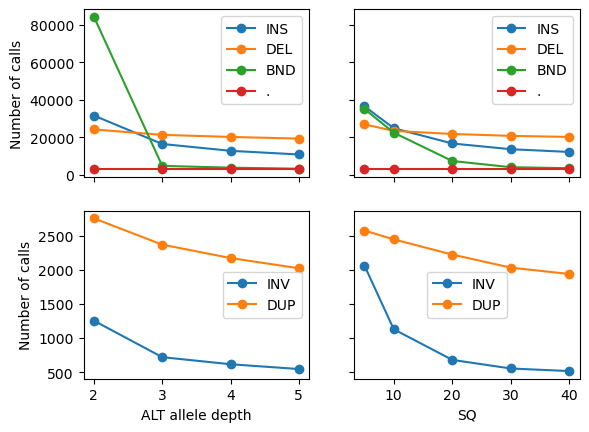

plots_svs/filter_calls_total_freq1.png


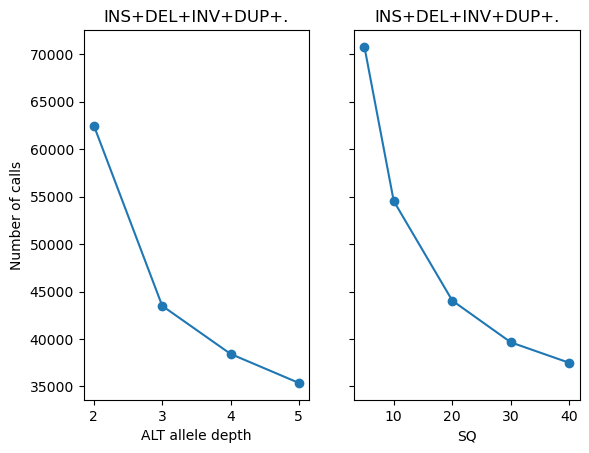

In [6]:
##############################
### plot filtering AD, SQ
##############################
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.', 'BND']
freq_thr = 1
#freq_thr = 0.05

ads = [2, 3, 4, 5]
qs = [5, 10, 20, 30, 40]
sv_counts_ad = []
sv_counts_q = []
for ad in ads:
    #print(f'++++++++++++ AD{ad} filter ++++++++++')
    #this_df = df.loc[(df[f'NUM_AD{ad}_SAMPLES'] > 0) | (df['NUM_IL_SAMPLES'] > 0)]
    flt_name = f'AD{ad}_SAMPLES'
    this_df = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=False, freq_thr=freq_thr)
    sv_counts_ad.append(this_df.SVTYPE.value_counts())
    #n_pass = this_df.shape[0]
    #print(f'AD{ad} filter, N pass: {n_pass}')
    #print(sv_counts_ad[-1])
    
    #this_df_cov = df.loc[(df[f'NUM_AD{ad}_SAMPLES'] > 0) & (df['NUM_ZERO_COV_SAMPLES'] < N_ZERO_COV_THR)]
    #n_pass_cov = this_df_cov.shape[0]
    #print(this_df_cov.SVTYPE.value_counts())
    #print(f'AD{ad} filter with N_ZERO_COV < {N_ZERO_COV_THR}, N pass: {n_pass_cov}')
    #print()
    
for q in qs:
    #print(f'++++++++++++ SQ{q} filter ++++++++++')
    #this_df = df.loc[(df[f'NUM_SQ{q}_SAMPLES'] > 0) | (df['NUM_IL_SAMPLES'] > 0)]
    flt_name = f'SQ{q}_SAMPLES'
    this_df = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=False, freq_thr=freq_thr)
    sv_counts_q.append(this_df.SVTYPE.value_counts())
    #n_pass = this_df.shape[0]
    #print(f'SQ{q} filter, N pass: {n_pass}')
    #print(sv_counts_q[-1])
    
    #this_df_cov = df.loc[(df[f'NUM_SQ{q}_SAMPLES'] > 0) & (df['NUM_ZERO_COV_SAMPLES'] < N_ZERO_COV_THR)]
    #n_pass_cov = this_df_cov.shape[0]
    #print(f'SQ{q} filter with N_ZERO_COV < {N_ZERO_COV_THR}, N pass: {n_pass_cov}')
    #print(this_df_cov.SVTYPE.value_counts())
    #print()

###########################
fig, axs = plt.subplots(nrows=2, ncols=2, sharey='row', sharex='col')
svtypes_1 = ['INS', 'DEL', 'BND', '.']
svtypes_2 = ['INV', 'DUP']
for svtype in svtypes_1:
    axs[0, 0].plot(ads, [x[svtype] for x in sv_counts_ad], '-o', label=svtype)
for svtype in svtypes_1:
    axs[0, 1].plot(qs, [x[svtype] for x in sv_counts_q], '-o', label=svtype)
for svtype in svtypes_2:
    axs[1, 0].plot(ads, [x[svtype] for x in sv_counts_ad], '-o', label=svtype)
for svtype in svtypes_2:
    axs[1, 1].plot(qs, [x[svtype] for x in sv_counts_q], '-o', label=svtype)

axs[1, 0].set_xlabel('ALT allele depth')
axs[1, 1].set_xlabel('SQ')
axs[0, 0].set_ylabel('Number of calls')
axs[1, 0].set_ylabel('Number of calls')
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

fig_name = dir_fig+f'filter_calls_freq{freq_thr}.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

svtypes = ['INS', 'DEL', 'INV', 'DUP', '.']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.plot(ads, [x[svtypes].sum() for x in sv_counts_ad], '-o')
ax2.plot(qs, [x[svtypes].sum() for x in sv_counts_q], '-o')
ax1.set_xlabel('ALT allele depth')
ax2.set_xlabel('SQ')
ax1.set_ylabel('Number of calls')
ax1.set_title('+'.join(svtypes))
ax2.set_title('+'.join(svtypes))
fig_name = dir_fig+f'filter_calls_total_freq{freq_thr}.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

total: (344736, 323)
filtered: (27669, 323)
plots_svs/hist_zero_cov_samples.png


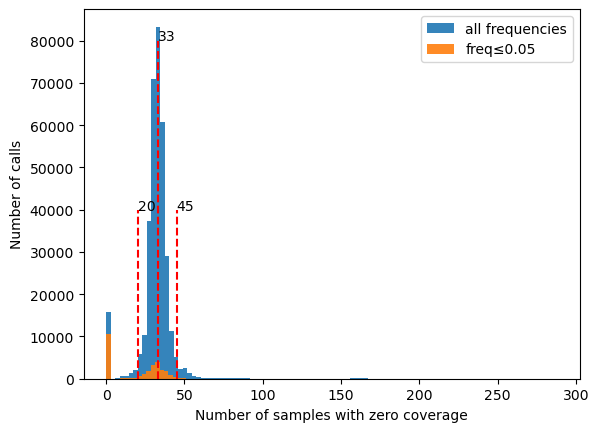

In [7]:
##########################################
### zero coverage sample distribution
##########################################
flt_name = 'AD3_SAMPLES'
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.']

# filter for main svtypes and quality
df_flt = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=True, freq_thr=0.05)
print(f'total: {df.shape}')
print(f'filtered: {df_flt.shape}')

plt.figure()
plt.hist(df.NUM_ZERO_COV_SAMPLES, bins=100, label='all frequencies', alpha=.9)
plt.hist(df_flt.NUM_ZERO_COV_SAMPLES, bins=100, label='freq≤0.05', alpha=.9)

x_val = 45
y_val = 40000
plt.plot([x_val, x_val], [0, y_val], '--r')
plt.text(x_val, y_val, f'{x_val}')	

x_val = 20
y_val = 40000
plt.plot([x_val, x_val], [0, y_val], '--r')
plt.text(x_val, y_val, f'{x_val}')	

x_val = 33
y_val = 80000
plt.plot([x_val, x_val], [0, y_val], '--r')
plt.text(x_val, y_val, f'{x_val}')

plt.xlabel('Number of samples with zero coverage')
plt.ylabel('Number of calls')
plt.legend()
fig_name = dir_fig+'hist_zero_cov_samples.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

total: (344736, 323)
filtered: (27731, 323)
len(samples_cases_list): 32071
len(samples_controls_list): 23284
plots_svs/sample_case_SQ20_SAMPLES_counts_hist_freq0.05


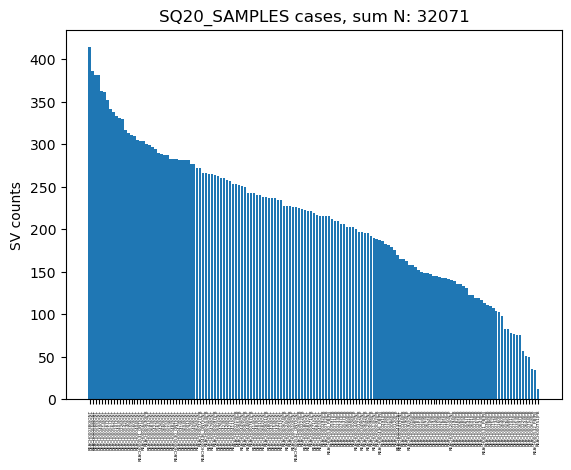

plots_svs/sample_control_SQ20_SAMPLES_counts_hist_freq0.05


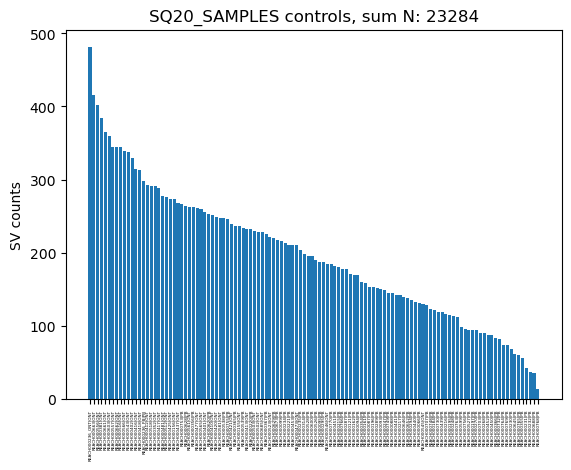

plots_svs/coverage_vs_svCount_SQ20_SAMPLES_freq0.05.png


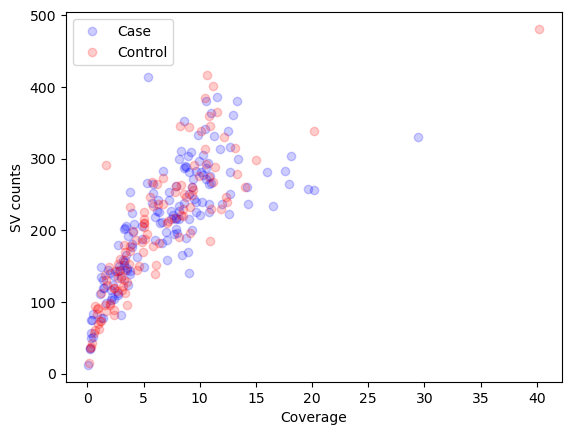

In [7]:
##########################################
### number of calls for each sample
##########################################
#flt_name = 'AD3_SAMPLES'
flt_name = 'SQ20_SAMPLES'
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.']

#freq_thr=1
freq_thr=0.05

# filter for main svtypes and quality
df_flt = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=True, freq_thr=freq_thr)
print(f'total: {df.shape}')
print(f'filtered: {df_flt.shape}')

samples_cases_list = ['|'.join([y, plat_dict[y]]) for xs, cs in zip(df_flt[flt_name].str.split(',').tolist(), 
                                          df_flt[f'case_{flt_name}'].str.split(',').tolist()) 
                      for y, c in zip(xs, cs) if c=='Yes']

samples_controls_list = ['|'.join([y, plat_dict[y]]) for xs, cs in zip(df_flt[flt_name].str.split(',').tolist(), 
                                          df_flt[f'case_{flt_name}'].str.split(',').tolist()) 
                      for y, c in zip(xs, cs) if c=='No']

print('len(samples_cases_list):', len(samples_cases_list))
print('len(samples_controls_list):', len(samples_controls_list))

df_cases = pd.DataFrame({'samples': samples_cases_list})
case_count_nums = df_cases.value_counts().tolist()
case_count_samples = df_cases.value_counts().index.get_level_values(0).tolist()
#print('count cases:')
#print(case_count_nums)
#print(case_count_samples)
df_case_samples = pd.DataFrame({'samples': [x.split('|')[0] for x in case_count_samples], 
                             'plat': [x.split('|')[1] for x in case_count_samples]})
df_case_samples['coverage'] = df_case_samples.apply(lambda row: df_cov.loc[(df_cov.SAMPLE==row['samples']) & 
                                              (df_cov.COHORT==row['plat'])]['MEAN_COVERAGE'].tolist()[0], axis=1)
#print(df_case_samples)


df_controls = pd.DataFrame({'samples': samples_controls_list})
control_count_nums = df_controls.value_counts().tolist()
control_count_samples = df_controls.value_counts().index.get_level_values(0).tolist()
#print('count controls:')
#print(control_count_nums)
#print(control_count_samples)
df_control_samples = pd.DataFrame({'samples': [x.split('|')[0] for x in control_count_samples], 
                             'plat': [x.split('|')[1] for x in control_count_samples]})
df_control_samples['coverage'] = df_control_samples.apply(lambda row: df_cov.loc[(df_cov.SAMPLE==row['samples']) & 
                                              (df_cov.COHORT==row['plat'])]['MEAN_COVERAGE'].tolist()[0], axis=1)
#print(df_control_samples)

fig, ax = plt.subplots()
ax.bar(case_count_samples, case_count_nums)
ax.set_xticks(case_count_samples, case_count_samples, rotation=90, fontsize=3)
ax.set_aspect('auto')
plt.ylabel('SV counts')
plt.title(f'{flt_name} cases, sum N: {df_cases.shape[0]}')
fig_name = dir_fig+f'sample_case_{flt_name}_counts_hist_freq{freq_thr}'
print(fig_name)
plt.savefig(fig_name+'.png', bbox_inches='tight')
plt.savefig(fig_name+'.pdf', bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots()
ax.bar(control_count_samples, control_count_nums)
ax.set_xticks(control_count_samples, control_count_samples, rotation=90, fontsize=3)
ax.set_aspect('auto')
plt.ylabel('SV counts')
plt.title(f'{flt_name} controls, sum N: {df_controls.shape[0]}')
fig_name = dir_fig+f'sample_control_{flt_name}_counts_hist_freq{freq_thr}'
print(fig_name)
plt.savefig(fig_name+'.png', bbox_inches='tight')
plt.savefig(fig_name+'.pdf', bbox_inches='tight')
plt.show()
plt.close()

### coverage vs SV counts
plt.figure()
plt.plot(df_case_samples['coverage'], case_count_nums, 'ob', alpha=.2, label='Case')
plt.plot(df_control_samples['coverage'], control_count_nums, 'or', alpha=.2, label='Control')
plt.legend()
plt.xlabel('Coverage')
plt.ylabel('SV counts')
fig_name = dir_fig+f'coverage_vs_svCount_{flt_name}_freq{freq_thr}.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [6]:
def venn_(set1only, set2only, set1and2, labels_list, fig_name, title):
    plt.figure()
    venn2(subsets=(set1only, set2only, set1and2),
          set_labels=(labels_list[0], labels_list[1]), set_colors=('skyblue', 'lightgreen'))
    plt.title(title)
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.savefig(fig_name[:-4]+'.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

In [13]:
def hist(df, fig_name='out.png', log_scale=(True, True), bins='auto', palette=sb.color_palette(), sv_set={'DEL', 'DUP', 'INS', 'INV'},
        title='', hue=None):
    plt.figure()
    df_plot = df.loc[df.SVTYPE.isin(sv_set)]
    df_plot = df_plot.loc[df_plot.SVLEN <= 1e6]
    sb.histplot(data=df_plot, x='SVLEN', hue=hue, element="poly", log_scale=log_scale, fill=False, 
                bins=bins, palette=palette, linewidth=3)
    plt.title(title)
    plt.xlim(right=1e6)
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.savefig(fig_name[:-4]+'.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

total: (344736, 323)
filtered: (54239, 323)
df_flt_len: (51469, 323)


/tmp/ipykernel_1603657/3833373232.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(data=df_plot, x='SVLEN', hue=hue, element="poly", log_scale=log_scale, fill=False,


plots_svs/hist_svlen_all_svs_SQ10_SAMPLES_freq1_noPlat.png


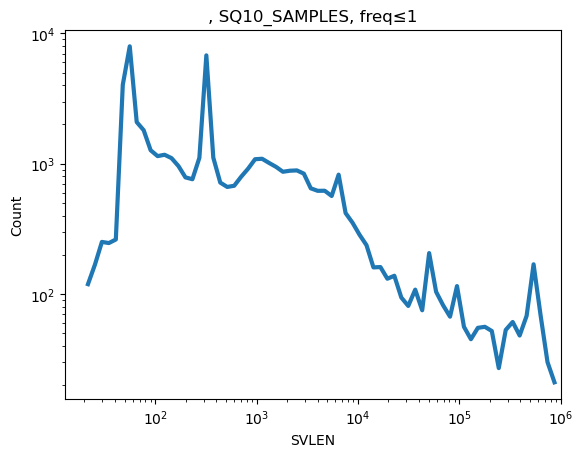

IL_ins: 2770
IL_del: 10401
IL_dup: 1248
IL_inv: 105
IL_bnd: 0
LR_ins: 20493
LR_del: 6260
LR_dup: 614
LR_inv: 929
LR_bnd: 0
LR_IL_ins: 4319
LR_IL_del: 6508
LR_IL_dup: 543
LR_IL_inv: 49
LR_IL_bnd: 0
plots_svs/IL_vs_LR_venn_allSVs_SQ10_SAMPLES_freq1.png


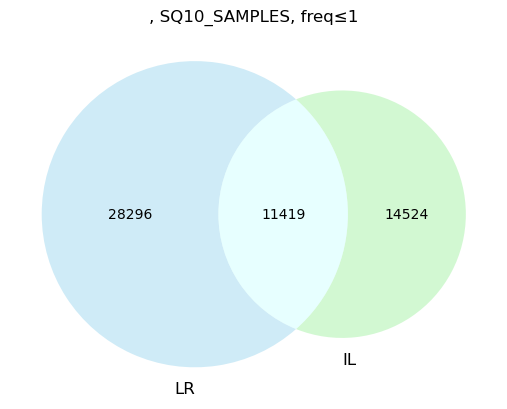

plots_svs/IL_vs_LR_venn_allSVs_ins_SQ10_SAMPLES_freq1.png


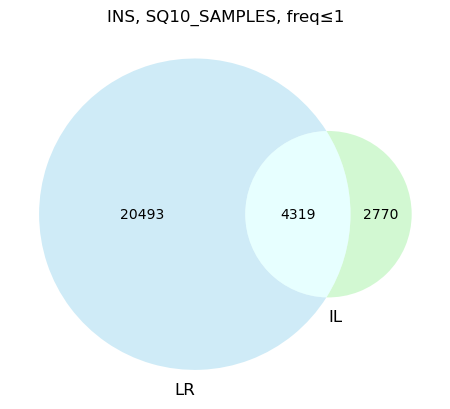

plots_svs/IL_vs_LR_venn_allSVs_del_SQ10_SAMPLES_freq1.png


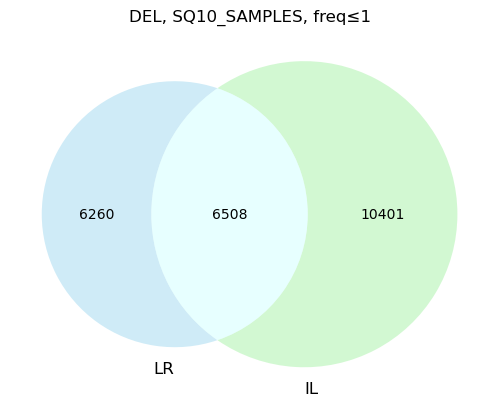

plots_svs/IL_vs_LR_venn_allSVs_dup_SQ10_SAMPLES_freq1.png


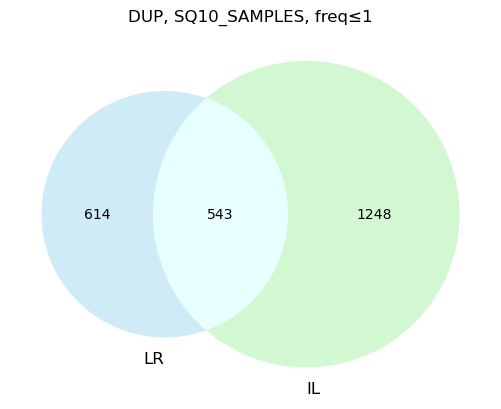

plots_svs/IL_vs_LR_venn_allSVs_inv_SQ10_SAMPLES_freq1.png


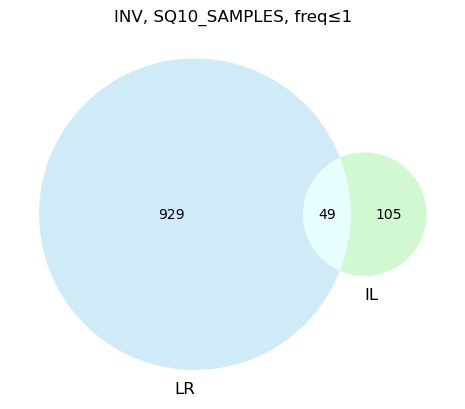

In [18]:
##########################################
### platform discovery rate
##########################################
#flt_name = 'AD3_SAMPLES'
flt_name = 'SQ20_SAMPLES'
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.']

freq_thr=1
#freq_thr=0.05

title_add = f', {flt_name}, freq≤{freq_thr}'

############# All variants ##############
# filter for main svtypes and quality
df_flt = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=True, freq_thr=freq_thr)
print(f'total: {df.shape}')
print(f'filtered: {df_flt.shape}')

df_flt_len = df_flt.loc[df_flt.SVTYPE!='.'].copy()
df_flt_len['SVLEN'] = df_flt_len['SVLEN'].astype(int).abs()
print(f'df_flt_len: {df_flt_len.shape}')
#fig_name = dir_fig+f'hist_svlen_all_svs_{flt_name}_freq{freq_thr}.png'
fig_name = dir_fig+f'hist_svlen_all_svs_{flt_name}_freq{freq_thr}_noPlat.png'
palette = {'LR': 'skyblue', 'IL':'lightgreen', 'LR_IL':'paleturquoise'}
#hist(df_flt_len, fig_name, palette=palette, title=title_add, hue='PLATFORM')
hist(df_flt_len, fig_name, palette=palette, title=title_add)

IL_ins = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='.')].shape[0]
IL_del = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='DEL')].shape[0]
IL_dup = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='DUP')].shape[0]
IL_inv = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='INV')].shape[0]
IL_bnd = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='BND')].shape[0]
IL_total = IL_ins + IL_del + IL_dup + IL_inv
print(f'IL_ins: {IL_ins}')
print(f'IL_del: {IL_del}')
print(f'IL_dup: {IL_dup}')
print(f'IL_inv: {IL_inv}')
print(f'IL_bnd: {IL_bnd}')

# SQ10
LR_ins = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='INS')].shape[0]
LR_del = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='DEL')].shape[0]
LR_dup = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='DUP')].shape[0]
LR_inv = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='INV')].shape[0]
LR_bnd = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='BND')].shape[0]
LR_total = LR_ins + LR_del + LR_dup + LR_inv
print(f'LR_ins: {LR_ins}')
print(f'LR_del: {LR_del}')
print(f'LR_dup: {LR_dup}')
print(f'LR_inv: {LR_inv}')
print(f'LR_bnd: {LR_bnd}')

LR_IL_ins = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='INS')].shape[0]
LR_IL_del = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='DEL')].shape[0]
LR_IL_dup = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='DUP')].shape[0]
LR_IL_inv = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='INV')].shape[0]
LR_IL_bnd = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='BND')].shape[0]
LR_IL_total = LR_IL_ins + LR_IL_del + LR_IL_dup + LR_IL_inv
print(f'LR_IL_ins: {LR_IL_ins}')
print(f'LR_IL_del: {LR_IL_del}')
print(f'LR_IL_dup: {LR_IL_dup}')
print(f'LR_IL_inv: {LR_IL_inv}')
print(f'LR_IL_bnd: {LR_IL_bnd}')

venn_(LR_total, IL_total, LR_IL_total, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_allSVs_{flt_name}_freq{freq_thr}.png', title=''+title_add)
venn_(LR_ins, IL_ins, LR_IL_ins, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_allSVs_ins_{flt_name}_freq{freq_thr}.png', title='INS'+title_add)
venn_(LR_del, IL_del, LR_IL_del, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_allSVs_del_{flt_name}_freq{freq_thr}.png', title='DEL'+title_add)
venn_(LR_dup, IL_dup, LR_IL_dup, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_allSVs_dup_{flt_name}_freq{freq_thr}.png', title='DUP'+title_add)
venn_(LR_inv, IL_inv, LR_IL_inv, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_allSVs_inv_{flt_name}_freq{freq_thr}.png', title='INV'+title_add)


total: (344736, 323)
filtered: (27731, 323)
df_flt_len: (923, 323)


/tmp/ipykernel_1603657/3833373232.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(data=df_plot, x='SVLEN', hue=hue, element="poly", log_scale=log_scale, fill=False,


plots_svs/hist_svlen_coding_svs_SQ20_SAMPLES_freq0.05_noPlat.png


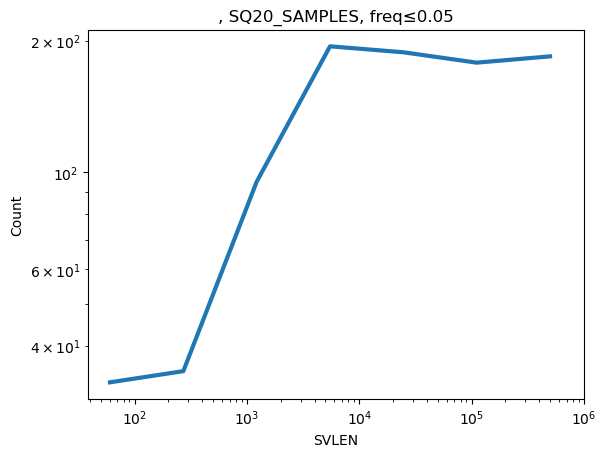

IL_ins: 3
IL_del: 196
IL_dup: 74
IL_inv: 2
IL_bnd: 0
LR_ins: 36
LR_del: 230
LR_dup: 97
LR_inv: 36
LR_bnd: 0
LR_IL_ins: 1
LR_IL_del: 179
LR_IL_dup: 70
LR_IL_inv: 2
LR_IL_bnd: 0
plots_svs/IL_vs_LR_venn_coding_SQ20_SAMPLES_freq0.05.png


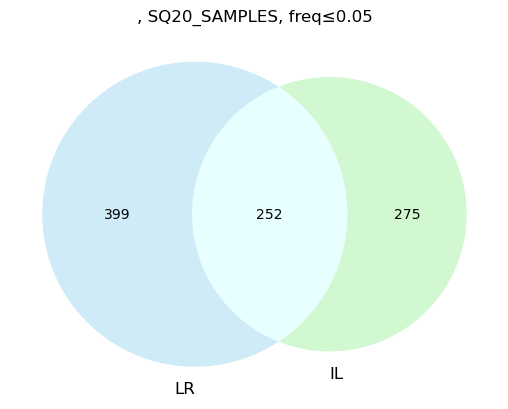

plots_svs/IL_vs_LR_venn_coding_ins_SQ20_SAMPLES_freq0.05.png


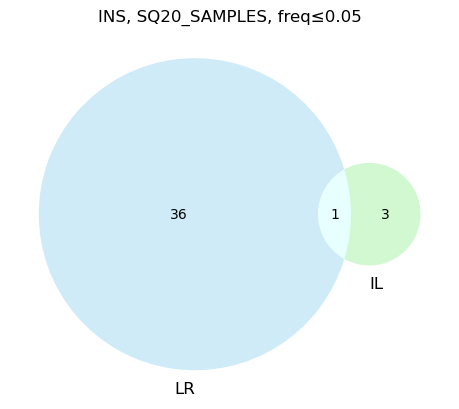

plots_svs/IL_vs_LR_venn_coding_del_SQ20_SAMPLES_freq0.05.png


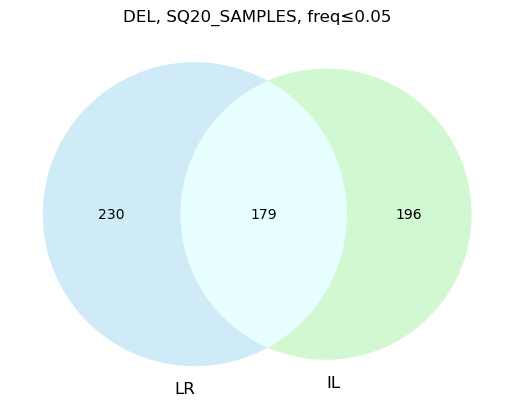

plots_svs/IL_vs_LR_venn_coding_dup_SQ20_SAMPLES_freq0.05.png


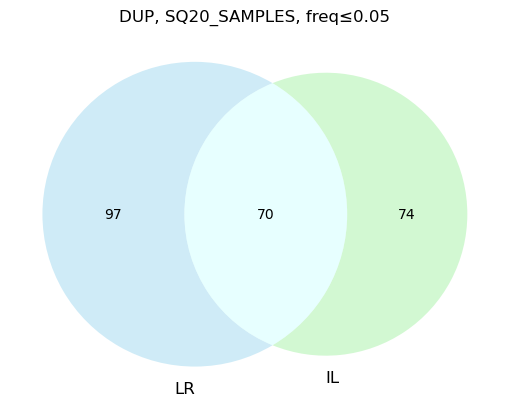

plots_svs/IL_vs_LR_venn_coding_inv_SQ20_SAMPLES_freq0.05.png


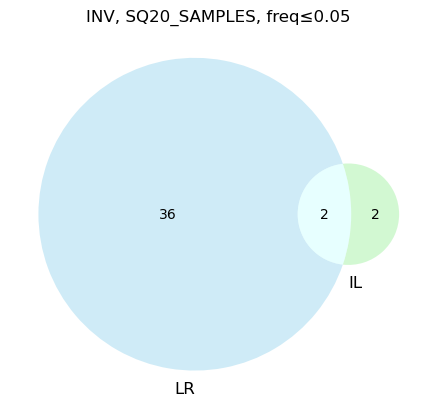

In [21]:
#flt_name = 'AD3_SAMPLES'
flt_name = 'SQ20_SAMPLES'
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.']

#freq_thr=1
freq_thr=0.05

title_add = f', {flt_name}, freq≤{freq_thr}'

############# Coding variants ##############
gen_list = ['CDS', 'start_codon', 'stop_codon']
# filter for main svtypes and quality
df_flt = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=True, freq_thr=freq_thr)
print(f'total: {df.shape}')
print(f'filtered: {df_flt.shape}')

df_flt_len = df_flt.loc[(df_flt.GENCODE.isin(gen_list)) & (df_flt.SVTYPE!='.')].copy()
df_flt_len['SVLEN'] = df_flt_len['SVLEN'].astype(int).abs()
print(f'df_flt_len: {df_flt_len.shape}')
#fig_name = dir_fig+f'hist_svlen_coding_svs_{flt_name}_freq{freq_thr}.png'
fig_name = dir_fig+f'hist_svlen_coding_svs_{flt_name}_freq{freq_thr}_noPlat.png'
palette = {'LR': 'skyblue', 'IL':'lightgreen', 'LR_IL':'paleturquoise'}
bins = 7
#hist(df_flt_len, fig_name, palette=palette, title=title_add, bins=bins, hue='PLATFORM')
hist(df_flt_len, fig_name, palette=palette, title=title_add, bins=bins)

IL_ins = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='.') & (df_flt.GENCODE.isin(gen_list))].shape[0]
IL_del = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='DEL') & (df_flt.GENCODE.isin(gen_list))].shape[0]
IL_dup = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='DUP') & (df_flt.GENCODE.isin(gen_list))].shape[0]
IL_inv = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='INV') & (df_flt.GENCODE.isin(gen_list))].shape[0]
IL_bnd = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='BND') & (df_flt.GENCODE.isin(gen_list))].shape[0]
#IL_ins = 0
#IL_del = 239
#IL_dup = 80
#IL_inv = 1
#IL_bnd = 7
IL_total = IL_ins + IL_del + IL_dup + IL_inv
print(f'IL_ins: {IL_ins}')
print(f'IL_del: {IL_del}')
print(f'IL_dup: {IL_dup}')
print(f'IL_inv: {IL_inv}')
print(f'IL_bnd: {IL_bnd}')

# SQ10
LR_ins = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='INS') & (df_flt.GENCODE.isin(gen_list))].shape[0]
LR_del = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='DEL') & (df_flt.GENCODE.isin(gen_list))].shape[0]
LR_dup = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='DUP') & (df_flt.GENCODE.isin(gen_list))].shape[0]
LR_inv = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='INV') & (df_flt.GENCODE.isin(gen_list))].shape[0]
LR_bnd = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='BND') & (df_flt.GENCODE.isin(gen_list))].shape[0]
#LR_ins = 74
#LR_del = 266
#LR_dup = 76
#LR_inv = 69
#LR_bnd = 193
LR_total = LR_ins + LR_del + LR_dup + LR_inv
print(f'LR_ins: {LR_ins}')
print(f'LR_del: {LR_del}')
print(f'LR_dup: {LR_dup}')
print(f'LR_inv: {LR_inv}')
print(f'LR_bnd: {LR_bnd}')

LR_IL_ins = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='INS') & (df_flt.GENCODE.isin(gen_list))].shape[0]
LR_IL_del = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='DEL') & (df_flt.GENCODE.isin(gen_list))].shape[0]
LR_IL_dup = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='DUP') & (df_flt.GENCODE.isin(gen_list))].shape[0]
LR_IL_inv = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='INV') & (df_flt.GENCODE.isin(gen_list))].shape[0]
LR_IL_bnd = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='BND') & (df_flt.GENCODE.isin(gen_list))].shape[0]
#LR_IL_ins = 1
#LR_IL_del = 210
#LR_IL_dup = 70
#LR_IL_inv = 2
#LR_IL_bnd = 0
LR_IL_total = LR_IL_ins + LR_IL_del + LR_IL_dup + LR_IL_inv
print(f'LR_IL_ins: {LR_IL_ins}')
print(f'LR_IL_del: {LR_IL_del}')
print(f'LR_IL_dup: {LR_IL_dup}')
print(f'LR_IL_inv: {LR_IL_inv}')
print(f'LR_IL_bnd: {LR_IL_bnd}')

venn_(LR_total, IL_total, LR_IL_total, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_{flt_name}_freq{freq_thr}.png', title=''+title_add)
venn_(LR_ins, IL_ins, LR_IL_ins, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_ins_{flt_name}_freq{freq_thr}.png', title='INS'+title_add)
venn_(LR_del, IL_del, LR_IL_del, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_del_{flt_name}_freq{freq_thr}.png', title='DEL'+title_add)
venn_(LR_dup, IL_dup, LR_IL_dup, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_dup_{flt_name}_freq{freq_thr}.png', title='DUP'+title_add)
venn_(LR_inv, IL_inv, LR_IL_inv, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_inv_{flt_name}_freq{freq_thr}.png', title='INV'+title_add)


total: (344736, 323)
filtered: (27731, 324)
df_flt_len: (124, 324)


/tmp/ipykernel_1603657/3833373232.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(data=df_plot, x='SVLEN', hue=hue, element="poly", log_scale=log_scale, fill=False,


plots_svs/hist_svlen_coding_constrained_svs_SQ20_SAMPLES_freq0.05_noPlat.png


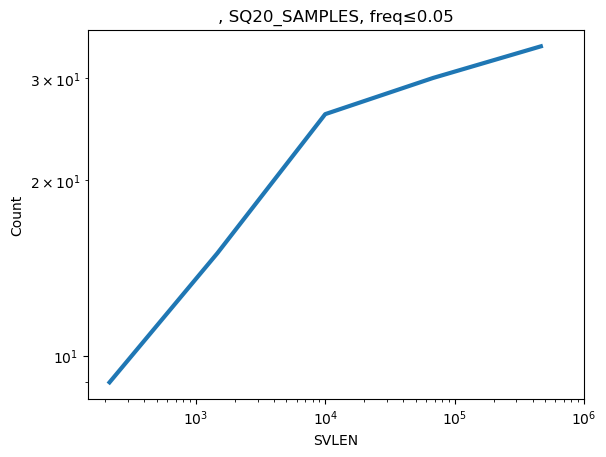

IL_ins: 0
IL_del: 34
IL_dup: 18
IL_inv: 0
IL_bnd: 0
LR_ins: 6
LR_del: 11
LR_dup: 8
LR_inv: 12
LR_bnd: 0
LR_IL_ins: 0
LR_IL_del: 16
LR_IL_dup: 18
LR_IL_inv: 1
LR_IL_bnd: 0
plots_svs/IL_vs_LR_venn_coding_constraint_SQ20_SAMPLES_freq0.05.png


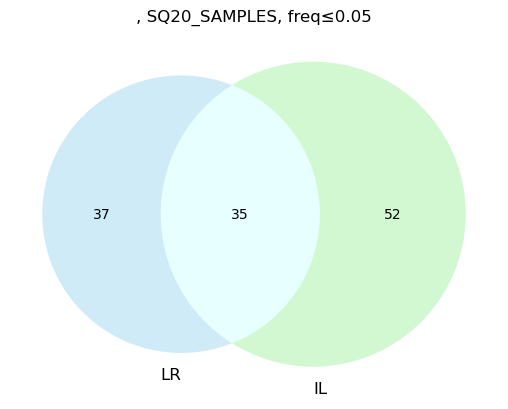

plots_svs/IL_vs_LR_venn_coding_constraint_ins_SQ20_SAMPLES_freq0.05.png


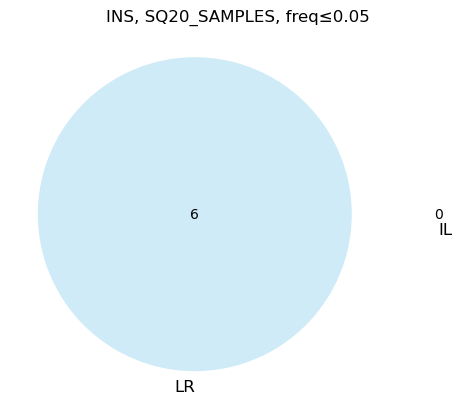

plots_svs/IL_vs_LR_venn_coding_constraint_del_SQ20_SAMPLES_freq0.05.png


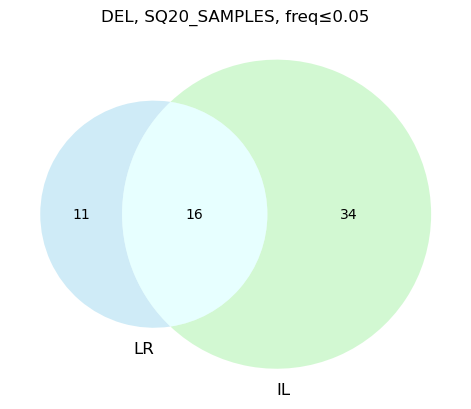

plots_svs/IL_vs_LR_venn_coding_constraint_dup_SQ20_SAMPLES_freq0.05.png


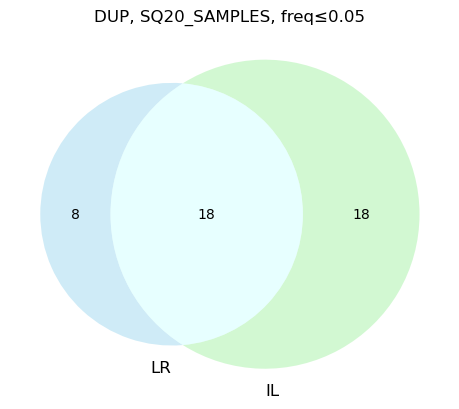

plots_svs/IL_vs_LR_venn_coding_constraint_inv_SQ20_SAMPLES_freq0.05.png


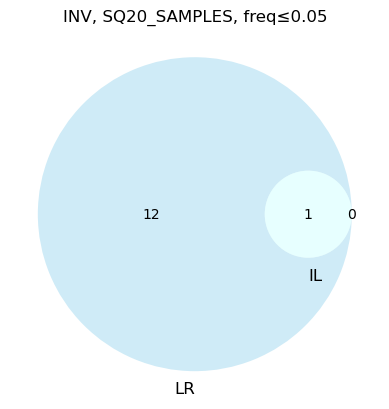

In [26]:
#flt_name = 'AD3_SAMPLES'
flt_name = 'SQ20_SAMPLES'
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.']

#freq_thr=1
freq_thr=0.05

title_add = f', {flt_name}, freq≤{freq_thr}'

############# Coding constrained variants ##############
gen_list = ['CDS', 'start_codon', 'stop_codon']
# filter for main svtypes and quality
df_flt = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=True, freq_thr=freq_thr)
df_flt['constrained'] = df_flt.apply(lambda row: 1 if ((row.X_PLIp9==1) or (row.X_LOEUF==1) or 
                                                       (row.X_FDR_ASD==1) or (row.X_FDR_DD==1) or (row.X_FDR_NDD==1)) else 0, axis=1)
print(f'total: {df.shape}')
print(f'filtered: {df_flt.shape}')
#display(df_flt)
#df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].to_csv(dir_fig+'test_data.tsv', sep='\t', 
#                                                                                                       header=True, index=False)

df_flt_len = df_flt.loc[(df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1) & (df_flt.SVTYPE!='.')].copy()
df_flt_len['SVLEN'] = df_flt_len['SVLEN'].astype(int).abs()
print(f'df_flt_len: {df_flt_len.shape}')
#fig_name = dir_fig+f'hist_svlen_coding_constrained_svs_{flt_name}_freq{freq_thr}.png'
fig_name = dir_fig+f'hist_svlen_coding_constrained_svs_{flt_name}_freq{freq_thr}_noPlat.png'
palette = {'LR': 'skyblue', 'IL':'lightgreen', 'LR_IL':'paleturquoise'}
bins = 5
#hist(df_flt_len, fig_name, palette=palette, title=title_add, bins=bins, hue='PLATFORM')
hist(df_flt_len, fig_name, palette=palette, title=title_add, bins=bins)

IL_ins = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='.') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
IL_del = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='DEL') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
IL_dup = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='DUP') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
IL_inv = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='INV') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
IL_bnd = df_flt.loc[(df_flt.PLATFORM=='IL') & (df_flt.SVTYPE=='BND') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
IL_total = IL_ins + IL_del + IL_dup + IL_inv
print(f'IL_ins: {IL_ins}')
print(f'IL_del: {IL_del}')
print(f'IL_dup: {IL_dup}')
print(f'IL_inv: {IL_inv}')
print(f'IL_bnd: {IL_bnd}')

LR_ins = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='INS') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_del = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='DEL') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_dup = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='DUP') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_inv = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='INV') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_bnd = df_flt.loc[(df_flt.PLATFORM=='LR') & (df_flt.SVTYPE=='BND') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_total = LR_ins + LR_del + LR_dup + LR_inv
print(f'LR_ins: {LR_ins}')
print(f'LR_del: {LR_del}')
print(f'LR_dup: {LR_dup}')
print(f'LR_inv: {LR_inv}')
print(f'LR_bnd: {LR_bnd}')

LR_IL_ins = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='INS') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_IL_del = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='DEL') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_IL_dup = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='DUP') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_IL_inv = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='INV') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_IL_bnd = df_flt.loc[(df_flt.PLATFORM=='LR_IL') & (df_flt.SVTYPE=='BND') & (df_flt.GENCODE.isin(gen_list)) & (df_flt.constrained==1)].shape[0]
LR_IL_total = LR_IL_ins + LR_IL_del + LR_IL_dup + LR_IL_inv
print(f'LR_IL_ins: {LR_IL_ins}')
print(f'LR_IL_del: {LR_IL_del}')
print(f'LR_IL_dup: {LR_IL_dup}')
print(f'LR_IL_inv: {LR_IL_inv}')
print(f'LR_IL_bnd: {LR_IL_bnd}')

venn_(LR_total, IL_total, LR_IL_total, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_constraint_{flt_name}_freq{freq_thr}.png', title=''+title_add)
venn_(LR_ins, IL_ins, LR_IL_ins, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_constraint_ins_{flt_name}_freq{freq_thr}.png', title='INS'+title_add)
venn_(LR_del, IL_del, LR_IL_del, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_constraint_del_{flt_name}_freq{freq_thr}.png', title='DEL'+title_add)
venn_(LR_dup, IL_dup, LR_IL_dup, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_constraint_dup_{flt_name}_freq{freq_thr}.png', title='DUP'+title_add)
venn_(LR_inv, IL_inv, LR_IL_inv, ['LR', 'IL'], dir_fig+f'IL_vs_LR_venn_coding_constraint_inv_{flt_name}_freq{freq_thr}.png', title='INV'+title_add)


In [ ]:
# this is to get some cohort statistics
file_name = ''
df_temp = pd.read_table(file_name, sep='\t')